<a href="https://colab.research.google.com/github/AbdelNas123/nassiria.github.io/blob/main/Case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

0.- Add the folder with the data to your drive by clicking:
https://drive.google.com/drive/folders/1PqO77g3xerNVHHBAE8BpZkCZKHCVN6rz?usp=sharing

Then you have to go to shared with you, right click in the folder CoastalResilience_Datasets, organize, add direct access, all locations, my unit.

Then you will be able to use the data.


--------------------------------------------------------------------------
1.- Define the number of case study

In [1]:
number_case_study =4

_______________
2.- Connect to data repository


In [2]:
#--- connect to my google drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


---
3.- Add lilbraries, paths, ...


In [11]:
# Importing libraries ----------------------------------------------------------
import subprocess
import sys
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np

#--- adding the utilities path -------------------------------------------------
utilities_path = '/content/drive/MyDrive/CoastalResilience_Datasets/Utilities'
if utilities_path not in sys.path:
    sys.path.append(utilities_path)

print(f"✅ Ruta agregada: {utilities_path}")

#--- adding functions from utilities -------------------------------------------
from spectral_analysis import calculate_spectrum, analyze_tidal_spectrum
from tidal_analysis import compute_tide
from wavelet_analysis import wavelet_analysis
from gesla4_reader import read_gesla4

#--- defining the data path and checking that files are listed correctly -------
path_data = f"/content/drive/MyDrive/CoastalResilience_Datasets/Case_{number_case_study}"


#--- list files in data directory
files=os.listdir(path_data)
print(files)


✅ Ruta agregada: /content/drive/MyDrive/CoastalResilience_Datasets/Utilities
['Atmospheric_data_CLEVELAND_DETROIT.txt', 'ERA5_UVP.nc', 'ToledoOH_waterlevel_CO-OPS__9063085__wl.csv']


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).




---



---




Let's start analyzing the data


---



---



In [5]:
import xarray as xr

In [6]:
eras5_data = xr.open_dataset('../content/drive/MyDrive/CoastalResilience_Datasets/Case_4/ERA5_UVP.nc')

In [8]:
eras5_data

<xarray.Dataset> Size: 2GB
Dimensions:     (valid_time: 144, latitude: 721, longitude: 1440)
Coordinates:
  * valid_time  (valid_time) datetime64[ns] 1kB 2012-05-29 ... 2012-06-03T23:...
  * latitude    (latitude) float64 6kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude   (longitude) float64 12kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
Data variables:
    u10         (valid_time, latitude, longitude) float32 598MB ...
    v10         (valid_time, latitude, longitude) float32 598MB ...
    msl         (valid_time, latitude, longitude) float32 598MB ...
Attributes:
    CDI:                     Climate Data Interface version 2.0.4 (https://mp...
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    history:                 Wed Nov 19 12:10:04 2025: cdo cat 58c2c3ec5ace00...
    CDO:                     Climate Data Operators version 2.0.4 (https://mp...

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import os


In [15]:
print("Dimensions:")
display(eras5_data.dims)

Dimensions:


FrozenMappingWarningOnValuesAccess({'valid_time': 144, 'latitude': 721, 'longitude': 1440})

In [16]:
print("Coordinates:")
display(eras5_data.coords)

Coordinates:


Coordinates:
  * valid_time  (valid_time) datetime64[ns] 1kB 2012-05-29 ... 2012-06-03T23:...
  * latitude    (latitude) float64 6kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude   (longitude) float64 12kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8

In [18]:
df_water_level.columns = df_water_level.columns.str.strip()
df_water_level['Date Time'] = pd.to_datetime(df_water_level['Date Time'])

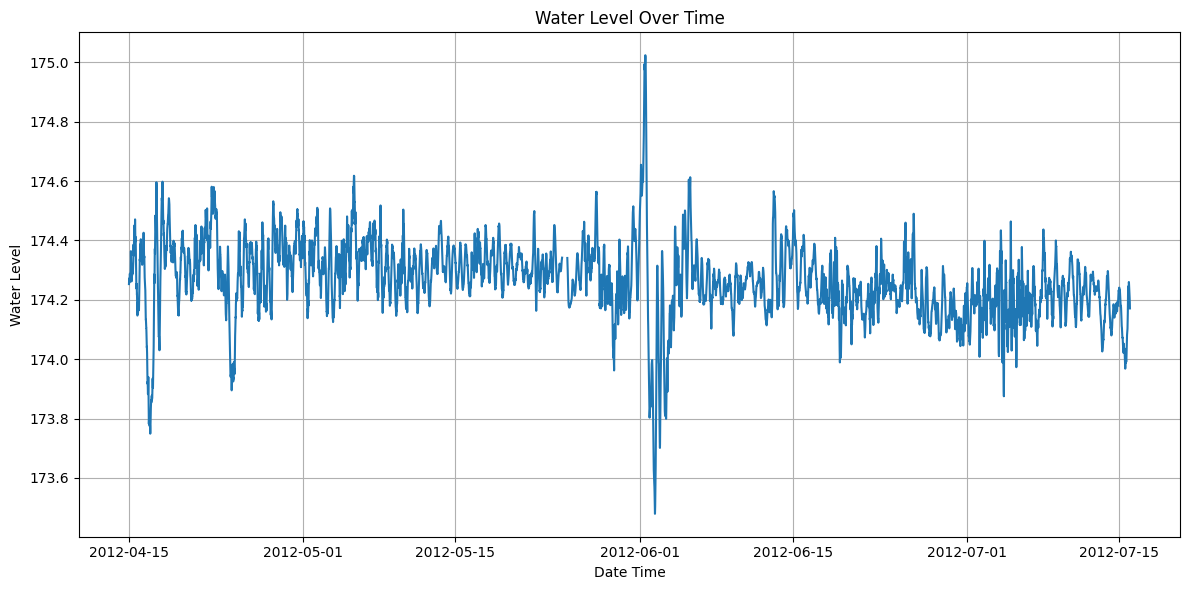

In [19]:
plt.figure(figsize=(12, 6))
plt.plot(df_water_level['Date Time'], df_water_level['Water Level'])
plt.xlabel('Date Time')
plt.ylabel('Water Level')
plt.title('Water Level Over Time')
plt.grid(True)
plt.tight_layout()
plt.show()

# Task
Calculate and identify extreme high and low water level events from `df_water_level` using 95th and 5th percentiles as thresholds, then visualize these events on a time series plot of water levels, and finally summarize the number, magnitudes, and timestamps of the identified extreme events.

## Calculate Extreme Event Thresholds

### Subtask:
Calculate statistical thresholds (e.g., 95th percentile for high events and 5th percentile for low events) from the 'Water Level' data to define what constitutes an 'extreme' event.


**Reasoning**:
To calculate the extreme event thresholds, I will compute the 95th and 5th percentiles of the 'Water Level' data using the `quantile()` method on the `df_water_level` DataFrame.



In [20]:
high_threshold = df_water_level['Water Level'].quantile(0.95)
low_threshold = df_water_level['Water Level'].quantile(0.05)

print(f"95th percentile (high threshold): {high_threshold:.3f}")
print(f"5th percentile (low threshold): {low_threshold:.3f}")

95th percentile (high threshold): 174.455
5th percentile (low threshold): 174.074


## Identify Extreme Events

### Subtask:
Filter the `df_water_level` DataFrame to identify and store the data points that correspond to extreme high and extreme low water level events based on the calculated thresholds.


**Reasoning**:
To identify extreme events, I will filter the `df_water_level` DataFrame using the previously calculated `high_threshold` and `low_threshold` to create `extreme_high_events` and `extreme_low_events` DataFrames, respectively.



In [21]:
extreme_high_events = df_water_level[df_water_level['Water Level'] > high_threshold].copy()
extreme_low_events = df_water_level[df_water_level['Water Level'] < low_threshold].copy()

print("Identified extreme high events:")
display(extreme_high_events.head())
print("\nIdentified extreme low events:")
display(extreme_low_events.head())

Identified extreme high events:


,Date Time,Water Level,Sigma,O or I (for verified),F,R,L,Quality
134,2012-04-15 13:24:00,174.469,0.001,0,0,0,0,v
135,2012-04-15 13:30:00,174.471,0.001,0,0,0,0,v
136,2012-04-15 13:36:00,174.461,0.002,0,0,0,0,v
581,2012-04-17 10:06:00,174.471,0.002,0,0,0,0,v
582,2012-04-17 10:12:00,174.481,0.001,0,0,0,0,v



Identified extreme low events:


,Date Time,Water Level,Sigma,O or I (for verified),F,R,L,Quality
389,2012-04-16 14:54:00,174.063,0.001,0,0,0,0,v
390,2012-04-16 15:00:00,174.055,0.001,0,0,0,0,v
391,2012-04-16 15:06:00,174.046,0.001,0,0,0,0,v
392,2012-04-16 15:12:00,174.041,0.000,0,0,0,0,v
393,2012-04-16 15:18:00,174.040,0.000,0,0,0,0,v


**Reasoning**:
The subtask of identifying extreme events has been completed. Now, to visualize these events, I will plot the water level time series and highlight the extreme high and low events on the same plot using the previously identified `extreme_high_events` and `extreme_low_events` DataFrames. I will also add lines for the high and low thresholds.



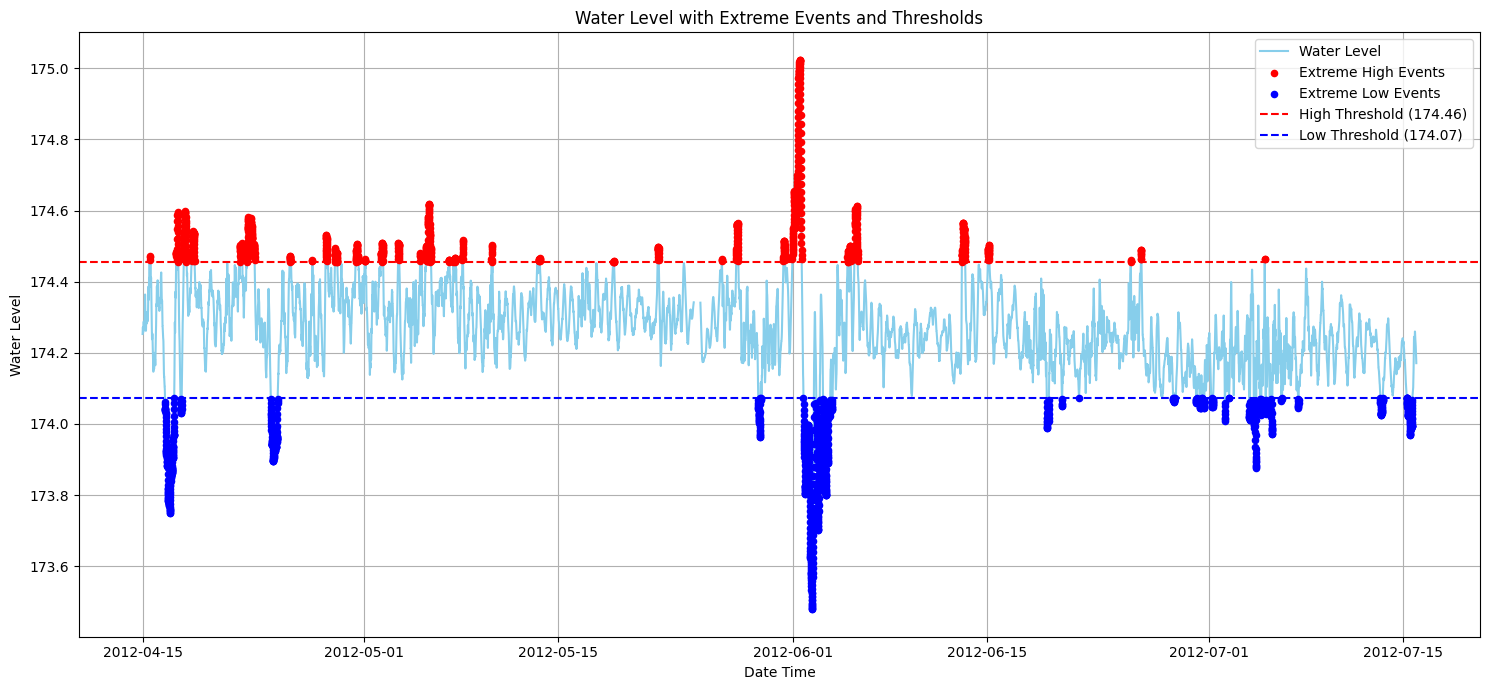

In [22]:
plt.figure(figsize=(15, 7))
plt.plot(df_water_level['Date Time'], df_water_level['Water Level'], label='Water Level', color='skyblue')
plt.scatter(extreme_high_events['Date Time'], extreme_high_events['Water Level'], color='red', s=20, label='Extreme High Events', zorder=5)
plt.scatter(extreme_low_events['Date Time'], extreme_low_events['Water Level'], color='blue', s=20, label='Extreme Low Events', zorder=5)
plt.axhline(high_threshold, color='red', linestyle='--', label=f'High Threshold ({high_threshold:.2f})')
plt.axhline(low_threshold, color='blue', linestyle='--', label=f'Low Threshold ({low_threshold:.2f})')
plt.xlabel('Date Time')
plt.ylabel('Water Level')
plt.title('Water Level with Extreme Events and Thresholds')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Summarize Extreme Events

### Subtask:
Summarize the number, magnitudes, and timestamps of the identified extreme high and low water level events.

**Reasoning**:
To summarize the extreme events, I will calculate the count, mean, minimum, and maximum water levels for both `extreme_high_events` and `extreme_low_events` DataFrames. I will also display the first few timestamps of each type of event to provide a sense of when they occurred.

**Reasoning**:
As outlined in the reasoning, I will now compute descriptive statistics for both `extreme_high_events` and `extreme_low_events` DataFrames, including the count, mean, min, and max of the 'Water Level'. Additionally, I will display the first few timestamps for each type of event.



In [23]:
print("--- Extreme High Events Summary ---")
display(extreme_high_events['Water Level'].describe())
print("First 5 Extreme High Event Timestamps:")
display(extreme_high_events['Date Time'].head())

print("\n--- Extreme Low Events Summary ---")
display(extreme_low_events['Water Level'].describe())
print("First 5 Extreme Low Event Timestamps:")
display(extreme_low_events['Date Time'].head())

--- Extreme High Events Summary ---


,Water Level
count,1080.000000
mean,174.534483
std,0.106545
min,174.456000
25%,174.476000
50%,174.500000
75%,174.554250
max,175.024000


First 5 Extreme High Event Timestamps:


,Date Time
134,2012-04-15 13:24:00
135,2012-04-15 13:30:00
136,2012-04-15 13:36:00
581,2012-04-17 10:06:00
582,2012-04-17 10:12:00



--- Extreme Low Events Summary ---


,Water Level
count,1093.000000
mean,173.945985
std,0.123391
min,173.479000
25%,173.880000
50%,173.984000
75%,174.041000
max,174.073000


First 5 Extreme Low Event Timestamps:


,Date Time
389,2012-04-16 14:54:00
390,2012-04-16 15:00:00
391,2012-04-16 15:06:00
392,2012-04-16 15:12:00
393,2012-04-16 15:18:00


## Final Task

### Subtask:
Present the findings on extreme sea level events, including the plot and summary statistics.


## Summary:

### Data Analysis Key Findings
*   **Extreme Event Thresholds**: The 95th percentile, identifying the high threshold for extreme water levels, was calculated at 174.455. The 5th percentile, defining the low threshold, was calculated at 174.074.
*   **Identification and Visualization of Events**: Water level data points exceeding the high threshold or falling below the low threshold were successfully identified as extreme events. These events were then visualized on a time series plot, clearly showing their occurrences relative to the overall water level trend and the calculated thresholds (extreme high events marked in red, extreme low events in blue).
*   **Summary of Extreme Events**: Detailed descriptive statistics (count, mean, standard deviation, minimum, maximum, and quartiles) were computed for both extreme high and extreme low water level events. This provided a quantitative overview of their magnitudes and frequencies. The initial timestamps for each type of extreme event were also displayed, offering insight into their timing.

### Insights or Next Steps
*   The clear identification and visualization of extreme water level events provide critical insights for risk assessment and operational planning, highlighting periods that may require heightened attention.
*   Future analysis could explore the underlying causes of these extreme events, such as correlation with meteorological data, tidal patterns, or anthropogenic factors, to develop predictive models and mitigation strategies.
